In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [14]:
print(cities)

['hobart', 'vaini', 'lata', 'butaritari', 'saint-pierre', 'bluff', 'grand river south east', 'avarua', 'preobrazheniye', 'hamilton', 'santa maria', 'ushuaia', 'kutum', 'belushya guba', 'castro', 'barrow', 'punta arenas', 'amderma', 'bethel', 'tuktoyaktuk', 'domoni', 'saint george', 'chuy', 'tateyama', 'provideniya', 'klaksvik', 'tsihombe', 'lorengau', 'bredasdorp', 'kruisfontein', 'kahama', 'berlevag', 'bardiyah', 'illoqqortoormiut', 'port-cartier', 'mahibadhoo', 'nikolskoye', 'plettenberg bay', 'rikitea', 'kimbe', 'bathsheba', 'lompoc', 'hermanus', 'tautira', 'constitucion', 'cap malheureux', 'xining', 'itarema', 'cape town', 'qarqin', 'saskylakh', 'mys shmidta', 'broken hill', 'bilma', 'mataura', 'hasaki', 'busselton', 'albany', 'mimongo', 'hilo', 'conceicao da barra', 'carutapera', 'port alfred', 'algeciras', 'pangnirtung', 'hithadhoo', 'padang', 'panalingaan', 'taolanaro', 'mattru', 'hami', 'ayan', 'khatanga', 'port hardy', 'rabo de peixe', 'barawe', 'mounana', 'puerto ayora', 'boo

In [16]:
weather_responses = []
for city in cities:
    url = "https://api.openweathermap.org/data/2.5/weather?"
    query_url = url +"appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    weather_responses.append(response)

print(weather_responses)
    
    
    

[{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.19, 'feels_like': 282.18, 'temp_min': 280.52, 'temp_max': 284.41, 'pressure': 995, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 0, 'gust': 1.34}, 'clouds': {'all': 75}, 'dt': 1627737280, 'sys': {'type': 2, 'id': 2002195, 'country': 'AU', 'sunrise': 1627680216, 'sunset': 1627715423}, 'timezone': 36000, 'id': 2163355, 'name': 'Hobart', 'cod': 200}, {'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.24, 'feels_like': 296.9, 'temp_min': 296.24, 'temp_max': 296.24, 'pressure': 1006, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 270}, 'rain': {'1h': 0.15}, 'clouds': {'all': 90}, 'dt': 1627737540, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 

In [27]:
print(type(weather_responses[1]))

<class 'dict'>


In [19]:
city_df = pd.json_normalize(weather_responses)
city_df.to_csv("Resources/city_data.csv", index=False, header=True)

In [23]:
city_csv_df = pd.read_csv("Resources/city_data.csv")

list(city_csv_df.columns)

['weather',
 'base',
 'visibility',
 'dt',
 'timezone',
 'id',
 'name',
 'cod',
 'coord.lon',
 'coord.lat',
 'main.temp',
 'main.feels_like',
 'main.temp_min',
 'main.temp_max',
 'main.pressure',
 'main.humidity',
 'wind.speed',
 'wind.deg',
 'wind.gust',
 'clouds.all',
 'sys.type',
 'sys.id',
 'sys.country',
 'sys.sunrise',
 'sys.sunset',
 'rain.1h',
 'main.sea_level',
 'main.grnd_level',
 'message']

In [87]:
#row data from weatherPy
city_data_df = city_csv_df[["name", "coord.lat", "coord.lon", "main.temp", "main.humidity", "clouds.all", "wind.speed", "sys.country", "dt"]]
city_data_df.head()

,name,coord.lat,coord.lon,main.temp,main.humidity,clouds.all,wind.speed,sys.country,dt
0,Hobart,-42.8794,147.3294,283.19,74.0,75.0,0.45,AU,1.627737e+09
1,Vaini,-21.2000,-175.2000,296.24,88.0,90.0,5.66,TO,1.627738e+09
2,Lata,40.1629,-8.3327,292.87,36.0,100.0,7.16,PT,1.627738e+09
3,Butaritari,3.0707,172.7902,299.85,77.0,58.0,1.38,KI,1.627738e+09
4,Saint-Pierre,-21.3393,55.4781,296.03,67.0,0.0,13.89,RE,1.627737e+09


In [88]:
#Rename to beautify column head
rename_city_data_df = city_data_df.rename(columns={"name":"City", "coord.lat":"Lat", "coord.lon":"Lng", "main.temp":"Max Temp", "main.humidity":"Humidity", "clouds.all":"Cloudiness", "wind.speed":"Wind Speed", "sys.country":"Country", "dt":"DateCity"})
rename_city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,DateCity
0,Hobart,-42.8794,147.3294,283.19,74.0,75.0,0.45,AU,1.627737e+09
1,Vaini,-21.2000,-175.2000,296.24,88.0,90.0,5.66,TO,1.627738e+09
2,Lata,40.1629,-8.3327,292.87,36.0,100.0,7.16,PT,1.627738e+09
3,Butaritari,3.0707,172.7902,299.85,77.0,58.0,1.38,KI,1.627738e+09
4,Saint-Pierre,-21.3393,55.4781,296.03,67.0,0.0,13.89,RE,1.627737e+09
...,...,...,...,...,...,...,...,...,...
608,Tumaco,1.7986,-78.8156,298.31,87.0,100.0,2.23,CO,1.627738e+09
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,Panama City,8.9936,-79.5197,300.65,82.0,20.0,5.14,PA,1.627738e+09
611,Waingapu,-9.6567,120.2641,298.11,75.0,58.0,3.78,ID,1.627738e+09


In [89]:
rename_city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,DateCity
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.974769,22.147674,295.336542,65.607843,54.351159,3.835080,1.627738e+09
std,33.054859,88.055178,8.629491,23.770845,40.513927,2.488399,6.430632e+01
min,-54.800000,-175.200000,271.010000,6.000000,0.000000,0.000000,1.627737e+09
25%,-6.121900,-53.114700,289.220000,51.000000,9.000000,1.980000,1.627738e+09
50%,24.093400,24.731400,296.620000,72.000000,58.000000,3.420000,1.627738e+09
75%,46.616600,99.935700,300.750000,84.000000,99.000000,5.360000,1.627738e+09
max,78.218600,179.316700,317.960000,100.000000,100.000000,13.890000,1.627738e+09


In [90]:
rename_city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
DateCity      float64
dtype: object

In [91]:
rename_city_data_df["Humidity"]<100

0       True
1       True
2       True
3       True
4       True
       ...  
608     True
609    False
610     True
611     True
612     True
Name: Humidity, Length: 613, dtype: bool

In [92]:
city_humidity_df = rename_city_data_df.loc[rename_city_data_df["Humidity"]<100]
city_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,DateCity
0,Hobart,-42.8794,147.3294,283.19,74.0,75.0,0.45,AU,1.627737e+09
1,Vaini,-21.2000,-175.2000,296.24,88.0,90.0,5.66,TO,1.627738e+09
2,Lata,40.1629,-8.3327,292.87,36.0,100.0,7.16,PT,1.627738e+09
3,Butaritari,3.0707,172.7902,299.85,77.0,58.0,1.38,KI,1.627738e+09
4,Saint-Pierre,-21.3393,55.4781,296.03,67.0,0.0,13.89,RE,1.627737e+09
...,...,...,...,...,...,...,...,...,...
607,Kamenka,51.3223,42.7678,301.83,49.0,85.0,2.97,RU,1.627738e+09
608,Tumaco,1.7986,-78.8156,298.31,87.0,100.0,2.23,CO,1.627738e+09
610,Panama City,8.9936,-79.5197,300.65,82.0,20.0,5.14,PA,1.627738e+09
611,Waingapu,-9.6567,120.2641,298.11,75.0,58.0,3.78,ID,1.627738e+09


In [94]:
def celcius_to_fahr(temp_celcius):
    """ Function to convert temperature in degree celicius to degree fahrenheit
    temp_celcius : float
    temp_fahrenheit : float"""
    converted_temp = (temp_celcius - 32)*0.56
    return converted_temp

In [103]:
city_humidity_df["Max Temp"].apply(celcius_to_fahr)

0      140.6664
1      147.9744
2      146.0872
3      149.9960
4      147.8568
         ...   
607    151.1048
608    149.1336
610    150.4440
611    149.0216
612    147.3304
Name: Max Temp, Length: 555, dtype: float64

SCATTER PLOTS

In [152]:
%matplotlib notebook
import scipy.stats as st

<IPython.core.display.Javascript object>


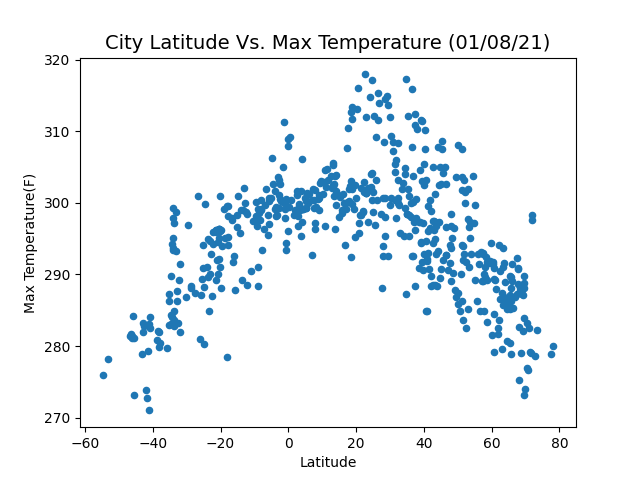

correlation between Latitude and Temperature is 0.01


Text(0, 0.5, 'Max Temperature(F)')

In [199]:
ax = city_humidity_df.plot.scatter(x="Lat", y="Max Temp")
plt.title("City Latitude Vs. Max Temperature (01/08/21)", fontsize=14)
r = city_humidity_df.corr()["Lat"]["Max Temp"]
print("correlation between Latitude and Temperature is {:.2f}".format(r))
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature(F)")

<IPython.core.display.Javascript object>


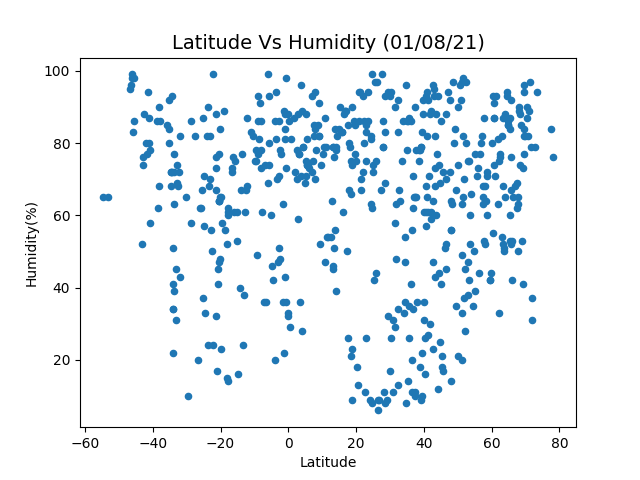

correlation between Latitude and Humidity is -0.02


Text(0, 0.5, 'Humidity(%)')

In [198]:
ax = city_humidity_df.plot.scatter(x="Lat", y="Humidity")
plt.title("Latitude Vs Humidity (01/08/21)", fontsize=14)
r = city_humidity_df.corr()["Lat"]["Humidity"]
print("correlation between Latitude and Humidity is {:.2f}".format(r))
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")

<IPython.core.display.Javascript object>


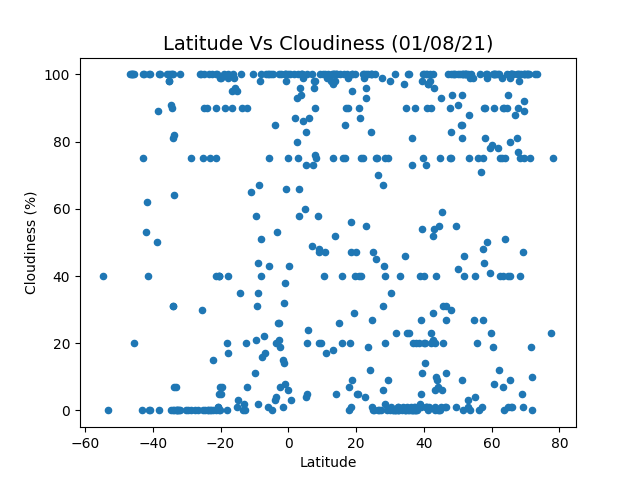

correlation between Latitude and Cloudiness is 0.05


Text(0, 0.5, 'Cloudiness (%)')

In [197]:
ax = city_humidity_df.plot.scatter(x="Lat", y="Cloudiness")
plt.title("Latitude Vs Cloudiness (01/08/21)", fontsize=14)
r = city_humidity_df.corr()["Lat"]["Cloudiness"]
print("correlation between Latitude and Cloudiness is {:.2f}".format(r))
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")

<IPython.core.display.Javascript object>


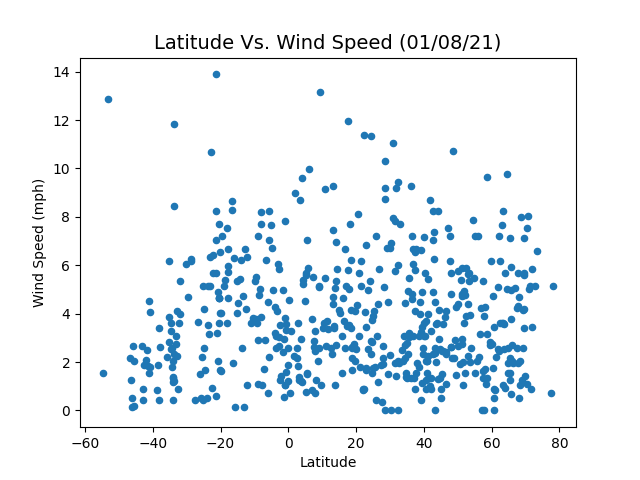

correlation between Latitude and Wind Speed is 0.00


Text(0, 0.5, 'Wind Speed (mph)')

In [196]:
ax = city_humidity_df.plot.scatter(x="Lat", y="Wind Speed")
plt.title("Latitude Vs. Wind Speed (01/08/21)", fontsize=14)
r = city_humidity_df.corr()["Lat"]["Wind Speed"]
print("correlation between Latitude and Wind Speed is {:.2f}".format(r))
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")

From the correlation performed on the WeatherPy data it can be seen that there is a very weak positive correlation between Temperature, Wind Speed and Cloudiness against Latitude but a negative correlation between Humidity and Latitude. This implies however that Latitude has nothing to do with Weather conditions

In [224]:
city_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,DateCity,Max_Temp_F,Max Temp_C,TEMP_F
0,Hobart,-42.8794,147.3294,283.19,74.0,75.0,0.45,AU,1.627737e+09,140.6664,140.6664,0.0
1,Vaini,-21.2000,-175.2000,296.24,88.0,90.0,5.66,TO,1.627738e+09,147.9744,147.9744,0.0
2,Lata,40.1629,-8.3327,292.87,36.0,100.0,7.16,PT,1.627738e+09,146.0872,146.0872,0.0
3,Butaritari,3.0707,172.7902,299.85,77.0,58.0,1.38,KI,1.627738e+09,149.9960,149.9960,0.0
4,Saint-Pierre,-21.3393,55.4781,296.03,67.0,0.0,13.89,RE,1.627737e+09,147.8568,147.8568,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Kamenka,51.3223,42.7678,301.83,49.0,85.0,2.97,RU,1.627738e+09,151.1048,151.1048,0.0
608,Tumaco,1.7986,-78.8156,298.31,87.0,100.0,2.23,CO,1.627738e+09,149.1336,149.1336,0.0
610,Panama City,8.9936,-79.5197,300.65,82.0,20.0,5.14,PA,1.627738e+09,150.4440,150.4440,0.0
611,Waingapu,-9.6567,120.2641,298.11,75.0,58.0,3.78,ID,1.627738e+09,149.0216,149.0216,0.0


In [228]:
city_humidity_df["Lat"]>=0

0      False
1      False
2       True
3       True
4      False
       ...  
607     True
608     True
610     True
611    False
612     True
Name: Lat, Length: 555, dtype: bool

In [229]:
city_north_hemisphere_df = city_humidity_df.loc[city_humidity_df["Lat"]>=0]
city_north_hemisphere_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,DateCity,Max_Temp_F,Max Temp_C,TEMP_F
2,Lata,40.1629,-8.3327,292.87,36.0,100.0,7.16,PT,1.627738e+09,146.0872,146.0872,0.0
3,Butaritari,3.0707,172.7902,299.85,77.0,58.0,1.38,KI,1.627738e+09,149.9960,149.9960,0.0
8,Preobrazheniye,42.9019,133.9064,296.15,93.0,96.0,6.25,RU,1.627738e+09,147.9240,147.9240,0.0
9,Hamilton,39.1834,-84.5333,294.38,79.0,1.0,0.45,US,1.627738e+09,146.9328,146.9328,0.0
12,Kutum,14.2000,24.6667,303.85,39.0,100.0,6.98,SD,1.627738e+09,152.2360,152.2360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Abalak,58.1286,68.5944,291.10,68.0,81.0,1.71,RU,1.627738e+09,145.0960,145.0960,0.0
607,Kamenka,51.3223,42.7678,301.83,49.0,85.0,2.97,RU,1.627738e+09,151.1048,151.1048,0.0
608,Tumaco,1.7986,-78.8156,298.31,87.0,100.0,2.23,CO,1.627738e+09,149.1336,149.1336,0.0
610,Panama City,8.9936,-79.5197,300.65,82.0,20.0,5.14,PA,1.627738e+09,150.4440,150.4440,0.0


In [230]:
city_south_hemisphere_df = city_humidity_df.loc[city_humidity_df["Lat"]<0]
city_south_hemisphere_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,DateCity,Max_Temp_F,Max Temp_C,TEMP_F
0,Hobart,-42.8794,147.3294,283.19,74.0,75.0,0.45,AU,1.627737e+09,140.6664,140.6664,0.0
1,Vaini,-21.2000,-175.2000,296.24,88.0,90.0,5.66,TO,1.627738e+09,147.9744,147.9744,0.0
4,Saint-Pierre,-21.3393,55.4781,296.03,67.0,0.0,13.89,RE,1.627737e+09,147.8568,147.8568,0.0
5,Bluff,-46.6000,168.3333,281.37,95.0,100.0,2.17,NZ,1.627738e+09,139.6472,139.6472,0.0
7,Avarua,-21.2078,-159.7750,296.18,73.0,75.0,8.23,CK,1.627738e+09,147.9408,147.9408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
586,Kasempa,-13.4584,25.8338,298.95,24.0,0.0,4.74,ZM,1.627738e+09,149.4920,149.4920,0.0
597,Dunedin,-45.8742,170.5036,284.15,83.0,100.0,2.68,NZ,1.627738e+09,141.2040,141.2040,0.0
601,Gladstone,-23.8500,151.2500,291.11,82.0,90.0,0.51,AU,1.627738e+09,145.1016,145.1016,0.0
605,Rocha,-34.4833,-54.3333,283.09,68.0,0.0,2.55,UY,1.627738e+09,140.6104,140.6104,0.0


<IPython.core.display.Javascript object>


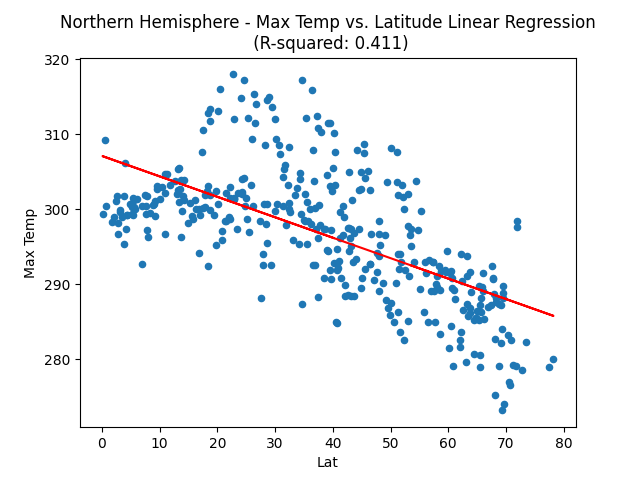

In [231]:
# Define scatter values for x and y axis
x_values = city_north_hemisphere_df["Lat"]
y_values = city_north_hemisphere_df["Max Temp"]
ax = city_north_hemisphere_df.plot.scatter(x="Lat", y="Max Temp")
#Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


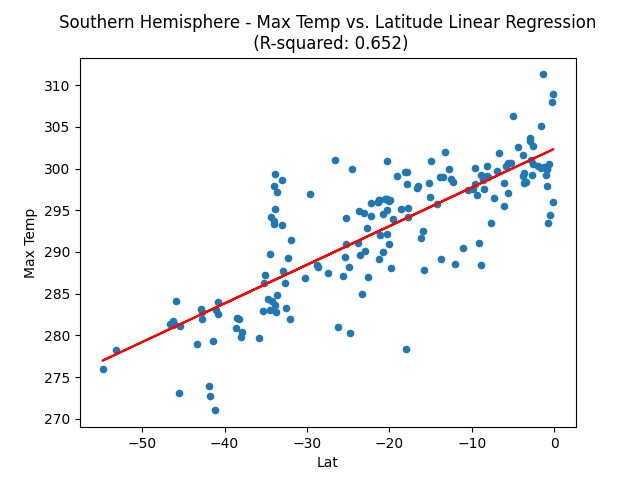

In [232]:
# Define scatter values for x and y axis
x_values = city_south_hemisphere_df["Lat"]
y_values = city_south_hemisphere_df["Max Temp"]
ax = city_south_hemisphere_df.plot.scatter(x="Lat", y="Max Temp")
#Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=2,color="red")

# Add title with the value for the r-squared
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


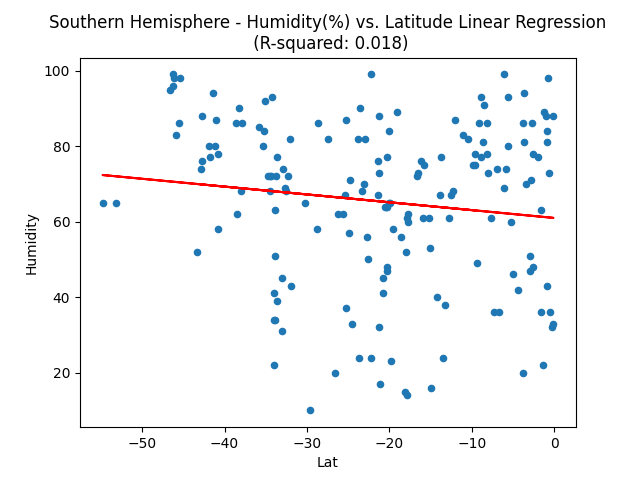

In [241]:
x_values = city_south_hemisphere_df["Lat"]
y_values = city_south_hemisphere_df["Humidity"]
ax = city_south_hemisphere_df.plot.scatter(x="Lat", y="Humidity")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


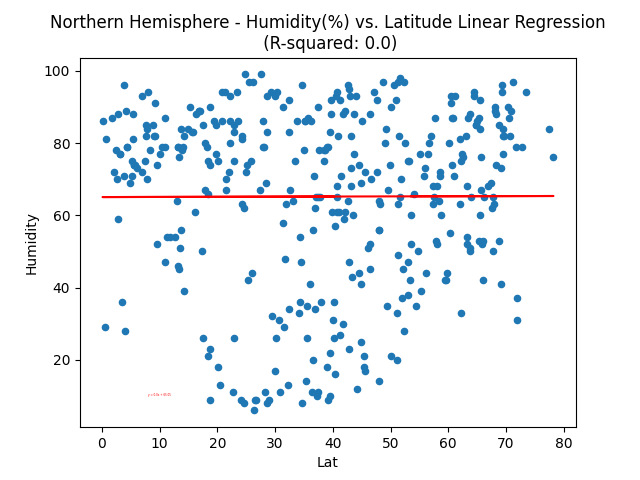

In [234]:
x_values = city_north_hemisphere_df["Lat"]
y_values = city_north_hemisphere_df["Humidity"]
ax = city_north_hemisphere_df.plot.scatter(x="Lat", y="Humidity")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=2,color="red")
plt.title(f"Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


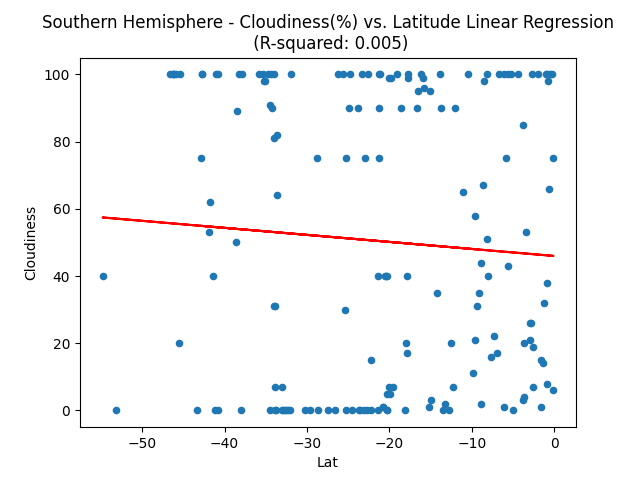

In [235]:
x_values = city_south_hemisphere_df["Lat"]
y_values = city_south_hemisphere_df["Cloudiness"]
ax = city_south_hemisphere_df.plot.scatter(x="Lat", y="Cloudiness")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=2,color="red")
plt.title(f"Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


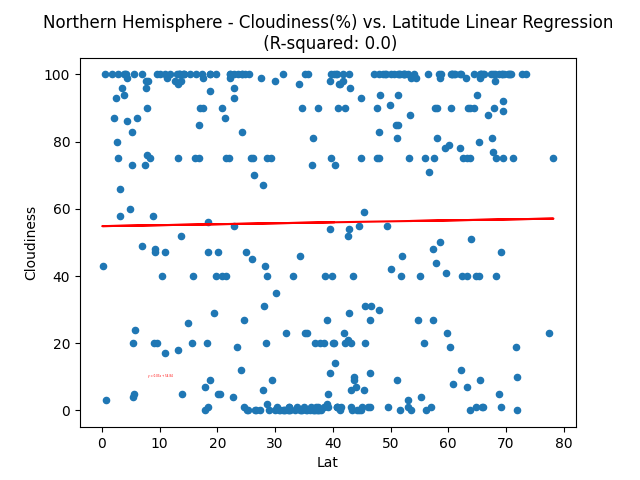

In [236]:
x_values = city_north_hemisphere_df["Lat"]
y_values = city_north_hemisphere_df["Cloudiness"]
ax = city_north_hemisphere_df.plot.scatter(x="Lat", y="Cloudiness")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=2,color="red")
plt.title(f"Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


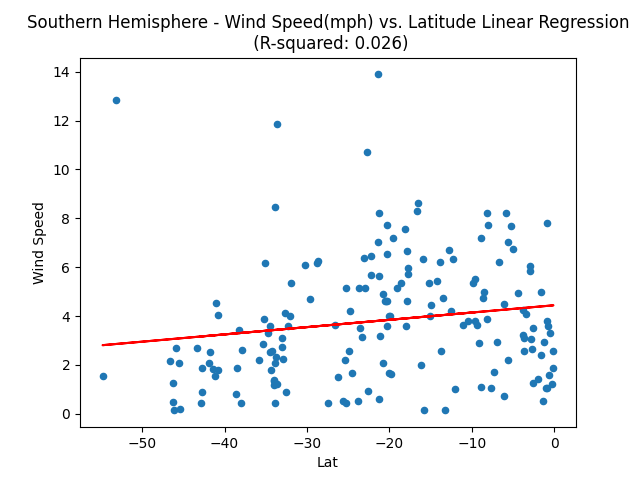

In [237]:
x_values = city_south_hemisphere_df["Lat"]
y_values = city_south_hemisphere_df["Wind Speed"]
ax = city_south_hemisphere_df.plot.scatter(x="Lat", y="Wind Speed")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()

<IPython.core.display.Javascript object>


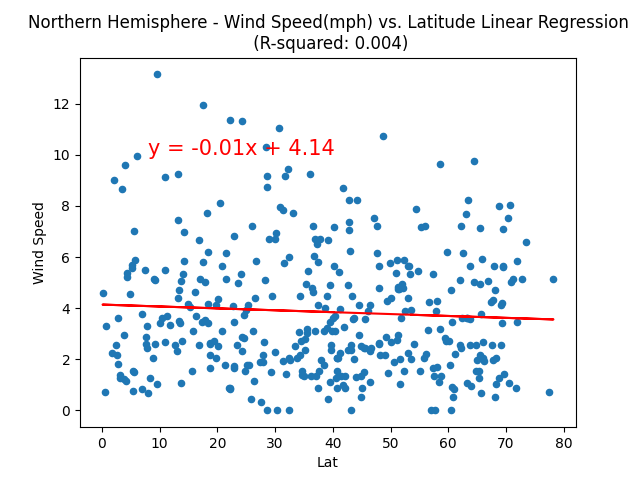

In [238]:
x_values = city_north_hemisphere_df["Lat"]
y_values = city_north_hemisphere_df["Wind Speed"]
ax = city_north_hemisphere_df.plot.scatter(x="Lat", y="Wind Speed")
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression\n (R-squared: {round(rvalue**2, 3)})")
plt.show()